In [1]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltration_times, percent_of_data_exfiltrated
from statistics import mean
import seaborn as sns

In [2]:
# Baseline attacker
baseline_standalone_d0_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/baseline_standalone_d0_h50'))
baseline_standalone_d2_h0 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/baseline_standalone_d2_h0'))
baseline_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/baseline_layered_d2_h50'))

# DFS attacker
dfs_standalone_d0_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/dfs_standalone_d0_h50'))
dfs_standalone_d2_h0 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/dfs_standalone_d2_h0'))
dfs_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/dfs_layered_d2_h50'))

# BFS attacker
bfs_standalone_d0_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/bfs_standalone_d0_h50'))
bfs_standalone_d2_h0 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/bfs_standalone_d2_h0'))
bfs_layered_d2_h50 = ingest_experiment_results(path.join('data/Layered/EquifaxSmall/bfs_layered_d2_h50'))

In [3]:
baseline_layered_d2_h50_times = get_data_exfiltration_times(baseline_layered_d2_h50, expected_files=2)
baseline_standalone_d0_h50_times = get_data_exfiltration_times(baseline_standalone_d0_h50, expected_files=2)
baseline_standalone_d2_h0_times = get_data_exfiltration_times(baseline_standalone_d2_h0, expected_files=2)

dfs_layered_d2_h50_times = get_data_exfiltration_times(dfs_layered_d2_h50, expected_files=12)
dfs_standalone_d0_h50_times = get_data_exfiltration_times(dfs_standalone_d0_h50, expected_files=12)
dfs_standalone_d2_h0_times = get_data_exfiltration_times(dfs_standalone_d2_h0, expected_files=12)

bfs_layered_d2_h50_times = get_data_exfiltration_times(bfs_layered_d2_h50, expected_files=12)
bfs_standalone_d0_h50_times = get_data_exfiltration_times(bfs_standalone_d0_h50, expected_files=12)
bfs_standalone_d2_h0_times = get_data_exfiltration_times(bfs_standalone_d2_h0, expected_files=12)

In [4]:
baseline_layered_d2_h50_times

[13.122387715180714, 14.192832422256469, 14.70550613005956, 12.195736809571583]

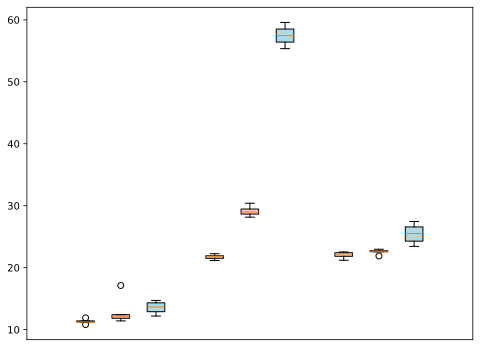

In [5]:
# Box plot comparing data exfiltration times
positions = [.3, .6, .9, 1.2, 1.5, 2.2]


baseline_data = [baseline_standalone_d2_h0_times, baseline_standalone_d0_h50_times, baseline_layered_d2_h50_times]
dfs_data = [dfs_standalone_d2_h0_times, dfs_standalone_d0_h50_times, dfs_layered_d2_h50_times]
bfs_data = [bfs_standalone_d2_h0_times, bfs_standalone_d0_h50_times, bfs_layered_d2_h50_times]

all_data = baseline_data + dfs_data + bfs_data

baseline_positions = [.3, .6, .9]
dfs_positions = [1.3, 1.6, 1.9]
bfs_positions = [2.3, 2.6, 2.9]
positions = [.3, .6, .9, 1.4, 1.7, 2.0, 2.5, 2.8, 3.1]

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(all_data, positions=positions, patch_artist=True, widths=0.15)

plt.xticks([])
# hide xticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('')
plt.xlabel('')
plt.title('')

# fill with colors
colors = ['lightgrey', 'pink', 'lightblue', 'lightgrey', 'pink', 'lightblue', 'lightgrey', 'pink', 'lightblue']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Output as svg
plt.savefig('./plots/adaptive_times.svg', transparent=True)

In [12]:
# DFS attacker
equiMed_dfs_standalone_d0_h50 = ingest_experiment_results(path.join('data/Adaptive/EquifaxMedium/dfs_standalone_d0_h50'))
equiMed_dfs_standalone_d2_h0 = ingest_experiment_results(path.join('data/Adaptive/EquifaxMedium/dfs_standalone_d2_h0'))
equiMed_dfs_layered_d2_h50 = ingest_experiment_results(path.join('data/Adaptive/EquifaxMedium/dfs_layered_d2_h50'))

In [13]:
equiMed_dfs_layered_d2_h50_times = get_data_exfiltration_times(equiMed_dfs_layered_d2_h50)
equiMed_dfs_standalone_d0_h50_times = get_data_exfiltration_times(equiMed_dfs_standalone_d0_h50)
equiMed_dfs_standalone_d2_h0_times = get_data_exfiltration_times(equiMed_dfs_standalone_d2_h0)

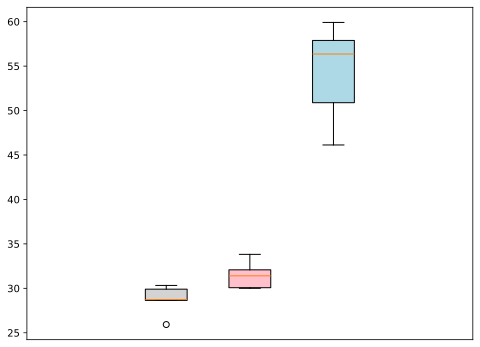

In [14]:
dfs_data = [equiMed_dfs_standalone_d2_h0_times, equiMed_dfs_standalone_d0_h50_times, equiMed_dfs_layered_d2_h50_times]
all_data =  dfs_data

baseline_positions = [.3, .6, .9]
positions = [.3, .6, .9]

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(all_data, positions=positions, patch_artist=True, widths=0.15)

plt.xticks([])
# hide xticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('')
plt.xlabel('')
plt.title('')

# fill with colors
colors = ['lightgrey', 'pink', 'lightblue']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Output as svg
plt.savefig('./plots/adaptive_times.svg', transparent=True)

<Axes: ylabel='Count'>

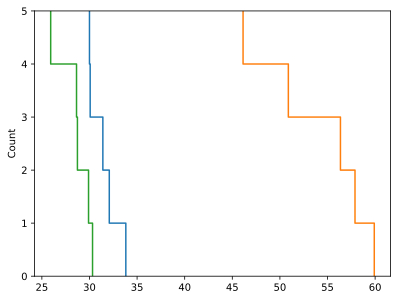

In [19]:
# create data for the ecdf plot
data = {}
data['baseline_standalone_d0_h50'] = equiMed_dfs_standalone_d0_h50_times
data['baseline_standalone_d2_h0'] = equiMed_dfs_layered_d2_h50_times
data['baseline_layered_d2_h50'] = equiMed_dfs_standalone_d2_h0_times

sns.ecdfplot(data=data, complementary=True, stat='count', legend=False)

In [6]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     